# IMPORT LIBRARY

In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost

# Fit Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
#Scoring function
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

# Train-Test Split
from sklearn.model_selection import train_test_split

# Cross Validation
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.model_selection import cross_val_score, learning_curve

# LOAD DATASET

In [9]:
df = pd.read_csv('Hotel_Satisfaction.csv')
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


# DATA CLEANING

In [10]:
#menghapus kolom-kolom yang tidak diperlukan
df = df.drop(['id'], axis = 1)

In [12]:
df.head(5)

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


# DATA PREPROCESSING

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Gender                          103904 non-null  object
 1   Age                             103904 non-null  int64 
 2   purpose_of_travel               103904 non-null  object
 3   Type of Travel                  103904 non-null  object
 4   Type Of Booking                 103904 non-null  object
 5   Hotel wifi service              103904 non-null  int64 
 6   Departure/Arrival  convenience  103904 non-null  int64 
 7   Ease of Online booking          103904 non-null  int64 
 8   Hotel location                  103904 non-null  int64 
 9   Food and drink                  103904 non-null  int64 
 10  Stay comfort                    103904 non-null  int64 
 11  Common Room entertainment       103904 non-null  int64 
 12  Checkin/Checkout service      

In [14]:
df.nunique()

Gender                             2
Age                               75
purpose_of_travel                  5
Type of Travel                     2
Type Of Booking                    3
Hotel wifi service                 6
Departure/Arrival  convenience     6
Ease of Online booking             6
Hotel location                     6
Food and drink                     6
Stay comfort                       6
Common Room entertainment          6
Checkin/Checkout service           6
Other service                      6
Cleanliness                        6
satisfaction                       2
dtype: int64

## Cek Missing Value

In [15]:
df.isnull().sum()

Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

## Check for duplication of data

In [16]:
df[df.duplicated()].shape

(1453, 16)

In [17]:
# deleting duplication data
df=df.drop_duplicates()

# DATA UNDERSTASNDING

In [18]:
#Numerik
df.describe()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,102451.000000,102451.000000,102451.000000,102451.000000,102451.000000,102451.000000,102451.000000,102451.000000,102451.000000,102451.000000,102451.000000
mean,39.399528,2.726562,3.060448,2.753531,2.976320,3.196055,3.430743,3.349133,3.299138,3.632732,3.278650
std,15.158475,1.327319,1.526594,1.399042,1.276306,1.330749,1.320682,1.334488,1.267329,1.178106,1.313849
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
#kategorik
df.describe(include = 'object')

,Gender,purpose_of_travel,Type of Travel,Type Of Booking,satisfaction
count,102451,102451,102451,102451,102451
unique,2,5,2,3,2
top,Female,tourism,Group Travel,Group bookings,neutral or dissatisfied
freq,52055,31460,70280,48446,58564


In [20]:
df.dtypes

Gender                            object
Age                                int64
purpose_of_travel                 object
Type of Travel                    object
Type Of Booking                   object
Hotel wifi service                 int64
Departure/Arrival  convenience     int64
Ease of Online booking             int64
Hotel location                     int64
Food and drink                     int64
Stay comfort                       int64
Common Room entertainment          int64
Checkin/Checkout service           int64
Other service                      int64
Cleanliness                        int64
satisfaction                      object
dtype: object

# Explonatory Data Analysis (EDA)

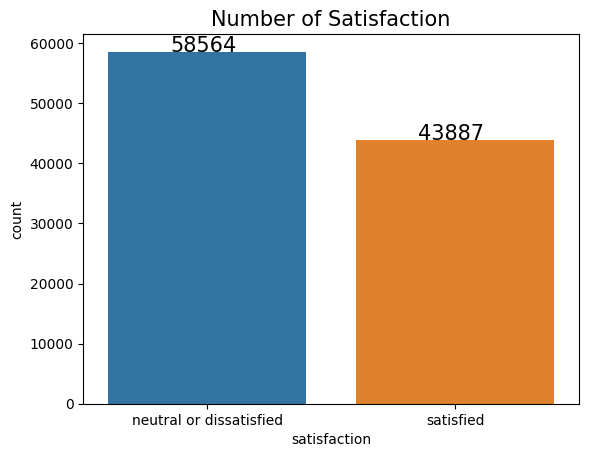

In [21]:
ax = sns.countplot(x='satisfaction', data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), fontsize=15);
ax.set_title("Number of Satisfaction",fontsize=15)
plt.show()

## Categorical Data Visualization

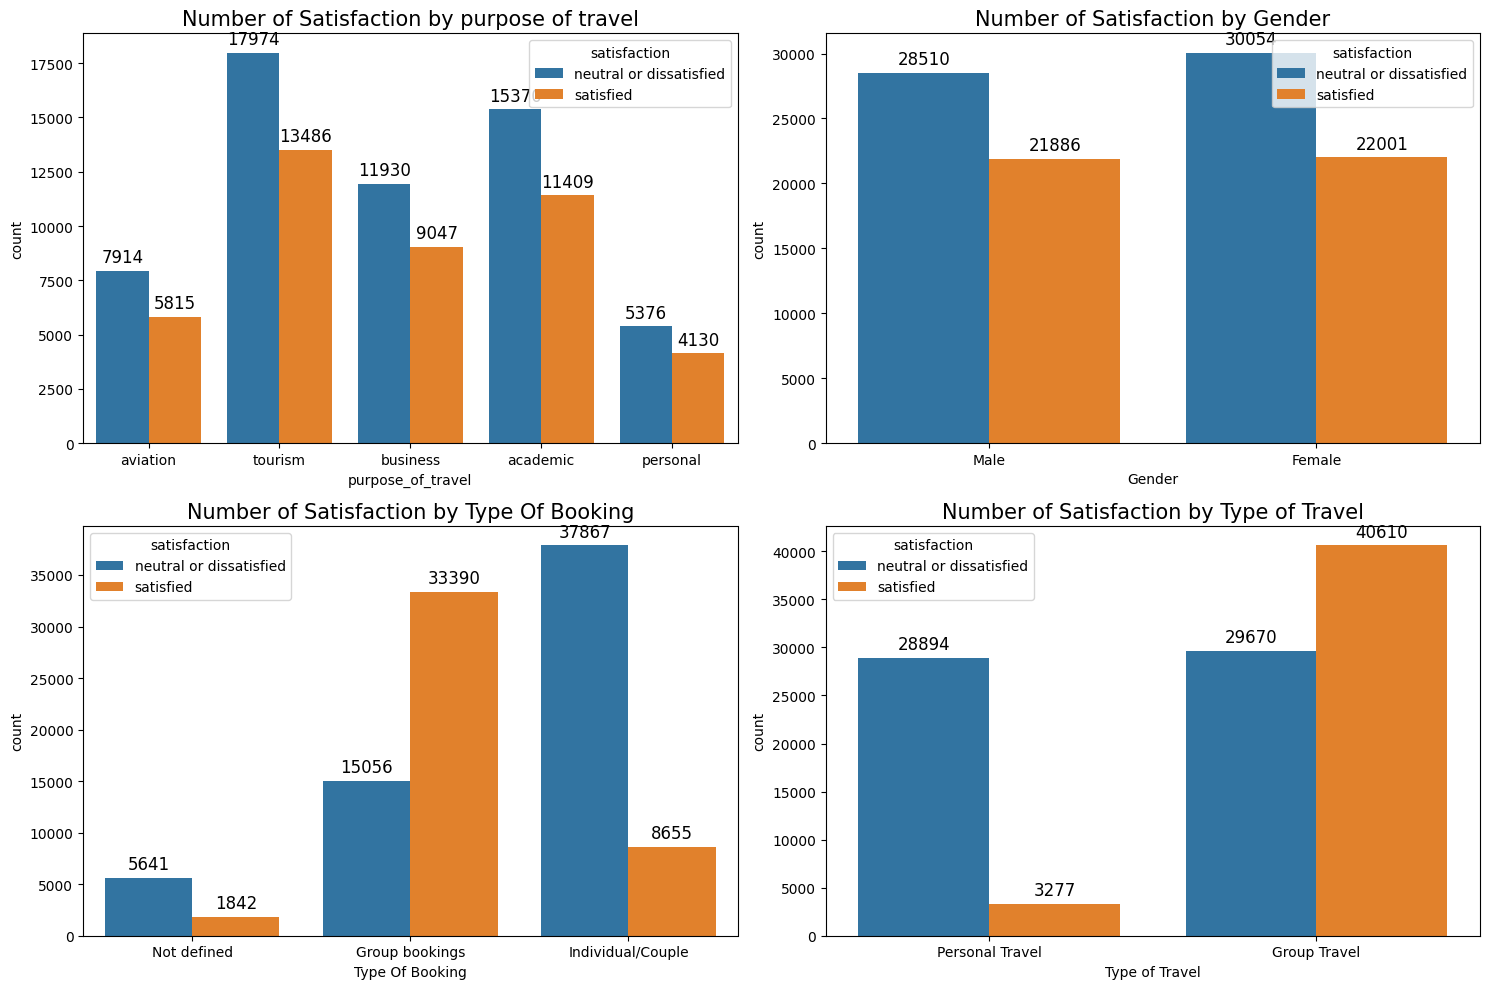

In [22]:
fig, axarr = plt.subplots(2, 2, figsize = (15,10))
sns.countplot (x='purpose_of_travel', hue = 'satisfaction', data = df, ax=axarr[0][0])
sns.countplot (x='Gender', hue = 'satisfaction', data = df, ax=axarr[0][1])
sns.countplot (x='Type Of Booking', hue = 'satisfaction', data = df, ax=axarr[1][0])
sns.countplot (x='Type of Travel', hue = 'satisfaction', data = df, ax=axarr[1][1])

for ax in axarr.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')
axarr[0,0].set_title("Number of Satisfaction by purpose of travel",fontsize=15)
axarr[0,1].set_title("Number of Satisfaction by Gender",fontsize=15)
axarr[1,0].set_title("Number of Satisfaction by Type Of Booking",fontsize=15)
axarr[1,1].set_title("Number of Satisfaction by Type of Travel",fontsize=15)
plt.tight_layout()
plt.show()

## Numerical Data Visualization

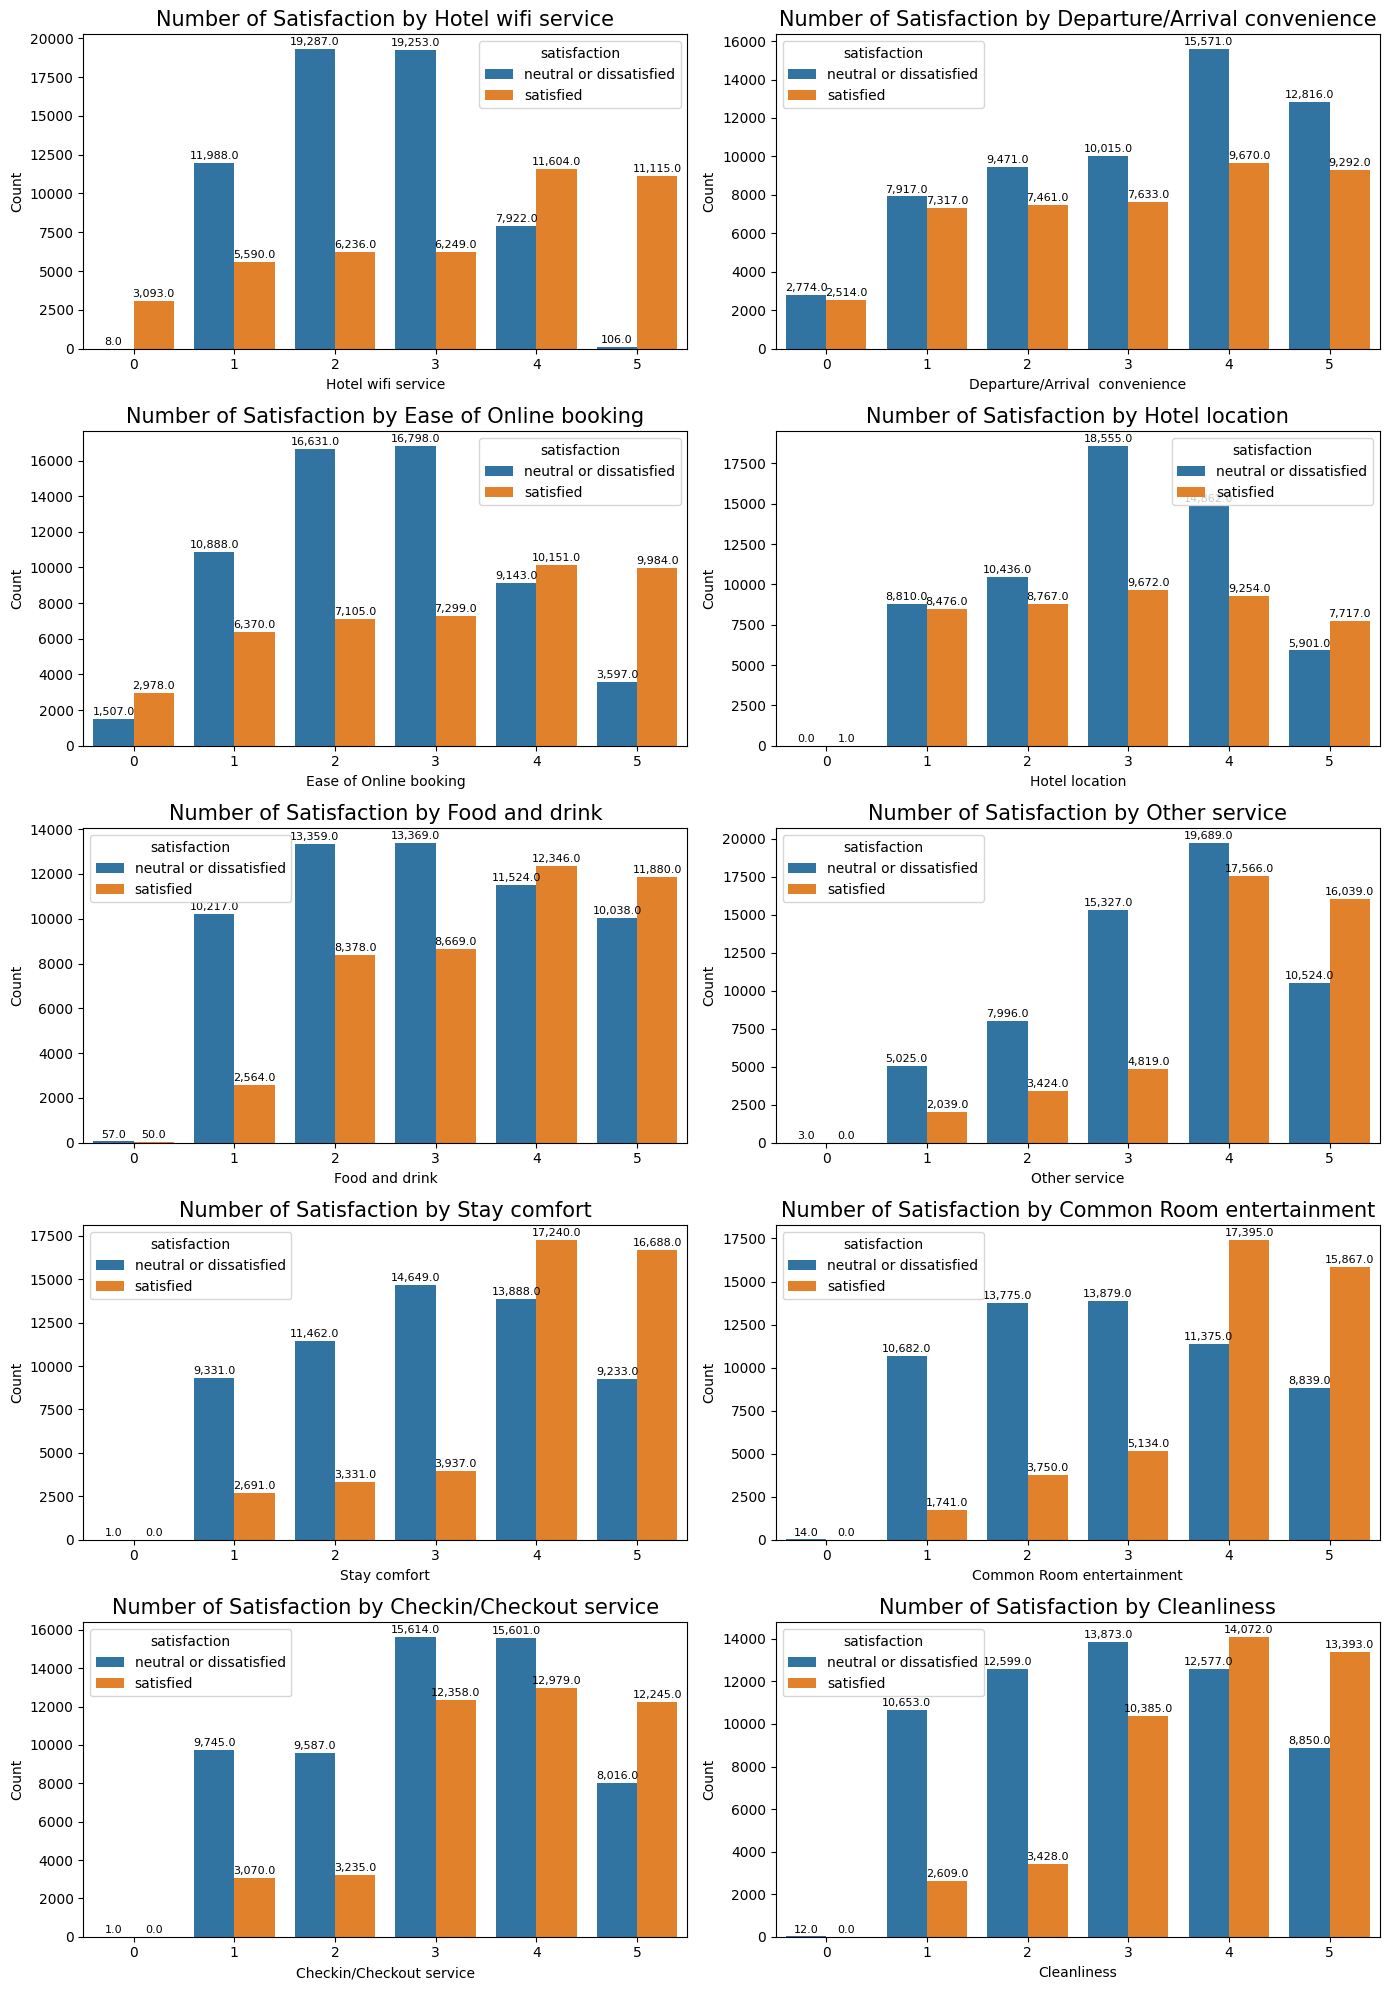

In [23]:
fig, ax = plt.subplots(5,2, figsize=(14, 20))
sns.countplot(data=df, x='Hotel wifi service', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='Departure/Arrival  convenience', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Ease of Online booking', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Hotel location', hue='satisfaction', ax=ax[1][1])
sns.countplot(data=df, x='Food and drink', hue='satisfaction', ax=ax[2][0])
sns.countplot(data=df, x='Other service', hue='satisfaction', ax=ax[2][1])
sns.countplot(data=df, x='Stay comfort', hue='satisfaction', ax=ax[3][0])
sns.countplot(data=df, x='Common Room entertainment', hue='satisfaction', ax=ax[3][1])
sns.countplot(data=df, x='Checkin/Checkout service', hue='satisfaction', ax=ax[4][0])
sns.countplot(data=df, x='Cleanliness', hue='satisfaction', ax=ax[4][1])
for i in range(5):
    for j in range(2):
        ax[i][j].set_ylabel('Count')
        for patch in ax[i][j].patches:
            count = '{:,}'.format(patch.get_height())
            ax[i][j].annotate(count, (patch.get_x() + patch.get_width() / 2, patch.get_height()),
                        ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')
ax[0,0].set_title("Number of Satisfaction by Hotel wifi service",fontsize=15)
ax[0,1].set_title("Number of Satisfaction by Departure/Arrival convenience",fontsize=15)
ax[1,0].set_title("Number of Satisfaction by Ease of Online booking",fontsize=15)
ax[1,1].set_title("Number of Satisfaction by Hotel location",fontsize=15)
ax[2,0].set_title("Number of Satisfaction by Food and drink",fontsize=15)
ax[2,1].set_title("Number of Satisfaction by Other service",fontsize=15)
ax[3,0].set_title("Number of Satisfaction by Stay comfort",fontsize=15)
ax[3,1].set_title("Number of Satisfaction by Common Room entertainment",fontsize=15)
ax[4,0].set_title("Number of Satisfaction by Checkin/Checkout service",fontsize=15)
ax[4,1].set_title("Number of Satisfaction by Cleanliness",fontsize=15)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


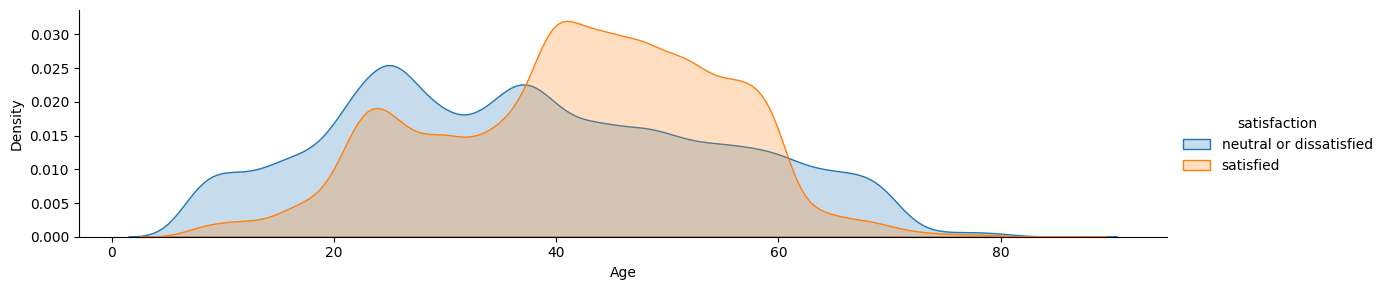

In [24]:
facet = sns.FacetGrid(df, hue = 'satisfaction', aspect = 4)
facet.map(sns.kdeplot, "Age", shade= True)
facet.add_legend()
plt.show()

## Correlation Matrix

C:\Users\User\AppData\Local\Temp\ipykernel_14308\3404519258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


<Axes: >

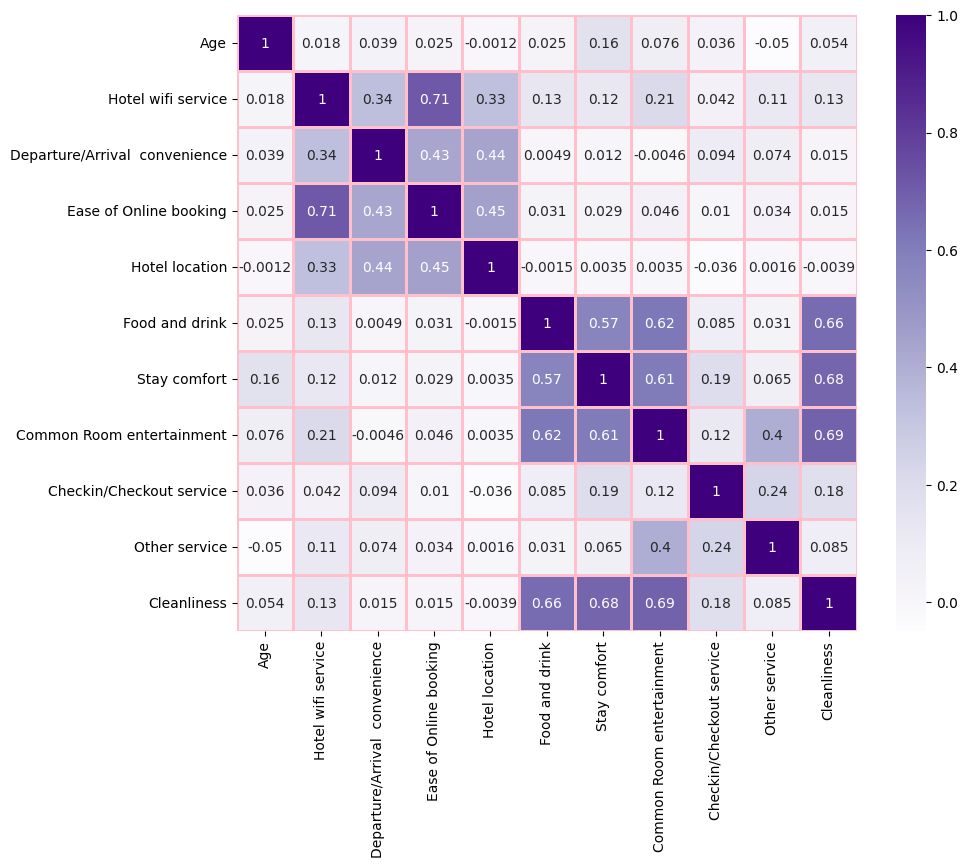

In [25]:
cm = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot = True, cmap = 'Purples',linewidth=1, linecolor='Pink')

## One Hot Encode / Label Encoder

In [26]:
column_to_encode = ['purpose_of_travel','Type Of Booking',]
df = pd.get_dummies(df,columns = column_to_encode)

df.head()

,Gender,Age,Type of Travel,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined
0,Male,13,Personal Travel,3,4,3,1,5,5,5,...,5,neutral or dissatisfied,0,1,0,0,0,0,0,1
1,Male,25,Group Travel,3,2,3,3,1,1,1,...,1,neutral or dissatisfied,0,0,0,0,1,1,0,0
2,Female,26,Group Travel,2,2,2,2,5,5,5,...,5,satisfied,0,0,0,0,1,1,0,0
3,Female,25,Group Travel,2,5,5,5,2,2,2,...,2,neutral or dissatisfied,0,0,0,0,1,1,0,0
4,Male,61,Group Travel,3,3,3,3,4,5,3,...,3,satisfied,0,1,0,0,0,1,0,0


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_encoded = df.copy()

col_to_encode1 = 'Gender'
col_to_encode2 = 'Type of Travel'
col_to_encode3 = 'satisfaction'

# label encoding purpose_of_travel
if df_encoded[col_to_encode1].dtype == 'object':
    df_encoded[col_to_encode1] = le.fit_transform(df[col_to_encode1])

# label encoding Type of booking
if df_encoded[col_to_encode2].dtype == 'object':
    df_encoded[col_to_encode2] = le.fit_transform(df[col_to_encode2])

# label encoding satisfaction
if df_encoded[col_to_encode3].dtype == 'object':
    df_encoded[col_to_encode3] = le.fit_transform(df[col_to_encode3])

df_encoded.head()

,Gender,Age,Type of Travel,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,Cleanliness,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined
0,1,13,1,3,4,3,1,5,5,5,...,5,0,0,1,0,0,0,0,0,1
1,1,25,0,3,2,3,3,1,1,1,...,1,0,0,0,0,0,1,1,0,0
2,0,26,0,2,2,2,2,5,5,5,...,5,1,0,0,0,0,1,1,0,0
3,0,25,0,2,5,5,5,2,2,2,...,2,0,0,0,0,0,1,1,0,0
4,1,61,0,3,3,3,3,4,5,3,...,3,1,0,1,0,0,0,1,0,0


Gender :

Felame
Male
Type Of Travel :

Group Travel
Personal Travel
Satisfaction :

Neutral or disastisfied
Satisfied

# FEATURE ENGINEERING

In [28]:
df_fe = df_encoded.copy()

In [29]:
df_fe['all_services'] = ((df_fe['Hotel wifi service']) + (df_fe['Departure/Arrival  convenience']) + 
                         (df_fe['Ease of Online booking']) + (df_fe['Hotel location']) + 
                         (df_fe['Food and drink']) + (df_fe['Stay comfort']) + 
                         (df_fe['Common Room entertainment']) + (df_fe['Checkin/Checkout service']) + 
                         (df_fe['Other service']) + (df_fe['Cleanliness']))/10

df_fe.head()

,Gender,Age,Type of Travel,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,satisfaction,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,all_services
0,1,13,1,3,4,3,1,5,5,5,...,0,0,1,0,0,0,0,0,1,4.0
1,1,25,0,3,2,3,3,1,1,1,...,0,0,0,0,0,1,1,0,0,2.0
2,0,26,0,2,2,2,2,5,5,5,...,1,0,0,0,0,1,1,0,0,3.6
3,0,25,0,2,5,5,5,2,2,2,...,0,0,0,0,0,1,1,0,0,3.0
4,1,61,0,3,3,3,3,4,5,3,...,1,0,1,0,0,0,1,0,0,3.3


# MODEL

In [30]:
#TRAIN TEST SPLIT

X = df_fe.drop(columns = ["satisfaction"]).copy()
y = df_fe["satisfaction"].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,
                                                    random_state = 0)

In [31]:
X.shape,y.shape

((102451, 22), (102451,))

In [32]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102451 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             102451 non-null  int32  
 1   Age                                102451 non-null  int64  
 2   Type of Travel                     102451 non-null  int32  
 3   Hotel wifi service                 102451 non-null  int64  
 4   Departure/Arrival  convenience     102451 non-null  int64  
 5   Ease of Online booking             102451 non-null  int64  
 6   Hotel location                     102451 non-null  int64  
 7   Food and drink                     102451 non-null  int64  
 8   Stay comfort                       102451 non-null  int64  
 9   Common Room entertainment          102451 non-null  int64  
 10  Checkin/Checkout service           102451 non-null  int64  
 11  Other service                      1024

In [34]:
df_fe.isnull().sum()

Gender                               0
Age                                  0
Type of Travel                       0
Hotel wifi service                   0
Departure/Arrival  convenience       0
Ease of Online booking               0
Hotel location                       0
Food and drink                       0
Stay comfort                         0
Common Room entertainment            0
Checkin/Checkout service             0
Other service                        0
Cleanliness                          0
satisfaction                         0
purpose_of_travel_academic           0
purpose_of_travel_aviation           0
purpose_of_travel_business           0
purpose_of_travel_personal           0
purpose_of_travel_tourism            0
Type Of Booking_Group bookings       0
Type Of Booking_Individual/Couple    0
Type Of Booking_Not defined          0
all_services                         0
dtype: int64

## Hyperparameter Tunning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# Define the classifiers
classifiers = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier()
]

# Define the hyperparameters to tune for each classifier
params = {
    'DecisionTreeClassifier': {'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2, 3]},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
    'GaussianNB': {},
    'RandomForestClassifier': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2, 3]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]},
    'ExtraTreesClassifier': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2, 3]},
    'XGBClassifier': {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
}

# Create a dictionary to store the best hyperparameters for each classifier
best_params = {}

# Loop through each classifier and perform hyperparameter tuning with GridSearchCV
for i, classifier in enumerate(classifiers):
    print(f"Classifier {i+1}: {classifier.__class__.__name__}")
    clf_name = classifier.__class__.__name__
    grid = GridSearchCV(classifier, params[clf_name], cv=5, n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)
    best_params[clf_name] = grid.best_params_
    print(f"Best hyperparameters: {best_params[clf_name]}\n")


Classifier 1: DecisionTreeClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 3}

Classifier 2: LogisticRegression
Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best hyperparameters: {'C': 1}

Classifier 3: KNeighborsClassifier
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters: {'n_neighbors': 5}

Classifier 4: GaussianNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {}

Classifier 5: RandomForestClassifier
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 100}

Classifier 6: GradientBoostingClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters: {'max_depth': 10, 'n_estimators': 150}

Classifier 7: ExtraTreesClassifier
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 100}

Classifier 8: XGBClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters: {'max_depth': 10, 'n_estimators': 50}



In [37]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Collect all models in one list (menambahkan  hasil dari hyperparameter tunning)
all_model = [DecisionTreeClassifier(max_depth=15, min_samples_leaf=3),
             LogisticRegression(C=0.1),             
             KNeighborsClassifier(n_neighbors=5),             
             GaussianNB(),             
             RandomForestClassifier(max_depth=15, min_samples_leaf=1, n_estimators=100),             
             GradientBoostingClassifier(max_depth=10, n_estimators=100),             
             ExtraTreesClassifier(max_depth=15, min_samples_leaf=1, n_estimators=100),            
             XGBClassifier(max_depth=10, n_estimators=50)]

model_name = ['DecisionTreeClassifier',              
              'LogisticRegression',              
              'KNeighborsClassifier',              
              'GaussianNB',              
              'RandomForestClassifier',              
              'GradientBoostingClassifier',              
              'ExtraTreesClassifier',              
              'XGBClassifier']

datatr = []
datasc = []
Recall = []
Precision = []
auc = []

for idx, model_type in enumerate(all_model):
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index, test_index in kf.split(X, y):
        X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = model_type
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        AccTrain.append(model.score(X_train_scaled, y_train))
        AccTest.append(model.score(X_test_scaled, y_test))
        RecallTemp.append(recall_score(y_test, y_pred))
        PrecisionTemp.append(precision_score(y_test, y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))

        nfold += 1

    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precision: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")


----------FINAL------------
DecisionTreeClassifier Acc Train: 0.9546392920131419
DecisionTreeClassifier Acc Test: 0.9336658479901626
DecisionTreeClassifier Recall: 0.9231207453001256
DecisionTreeClassifier Precision: 0.9221362791255736
DecisionTreeClassifier AUC: 0.9323444410092583
---------------------------


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

----------FINAL------------
LogisticRegression Acc Train: 0.8407067754593778
LogisticRegression Acc Test: 0.8408604832380195
LogisticRegression Recall: 0.8120398461637226
LogisticRegression Precision: 0.815674561678482
LogisticRegression AUC: 0.837248969266825
---------------------------
----------FINAL------------
KNeighborsClassifier Acc Train: 0.9288245114543372
KNeighborsClassifier Acc Test: 0.8989663607151126
KNeighborsClassifier Recall: 0.8636726829035674
KNeighborsClassifier Precision: 0.8966656512032118
KNeighborsClassifier AUC: 0.8945438283224272
---------------------------
----------FINAL------------
GaussianNB Acc Train: 0.8313218018694973
GaussianNB Acc Test: 0.8313340073189531
GaussianNB Recall: 0.818032587554004
GaussianNB Precision: 0.7943724218707147
GaussianNB AUC: 0.8296671747455117
---------------------------
----------FINAL------------
RandomForestClassifier Acc Train: 0.9597490524618271
RandomForestClassifier Acc Test: 0.9399810513294424
RandomForestClassifier Reca

In [38]:
# Comparing models
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
7,XGBClassifier,0.976020,0.949400,0.948891,0.932098,0.947232,0.026620
5,GradientBoostingClassifier,0.981652,0.949039,0.948387,0.931757,0.946873,0.032613
4,RandomForestClassifier,0.959749,0.939981,0.933739,0.925582,0.938177,0.019768
0,DecisionTreeClassifier,0.954639,0.933666,0.922136,0.923121,0.932344,0.020973
6,ExtraTreesClassifier,0.950552,0.932290,0.923010,0.918564,0.930570,0.018262
2,KNeighborsClassifier,0.928825,0.898966,0.896666,0.863673,0.894544,0.029858
1,LogisticRegression,0.840707,0.840860,0.815675,0.812040,0.837249,0.000154
3,GaussianNB,0.831322,0.831334,0.794372,0.818033,0.829667,0.000012


C:\Users\User\AppData\Local\Temp\ipykernel_14308\2230017997.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_hasil['model'], rotation=45, ha='right')


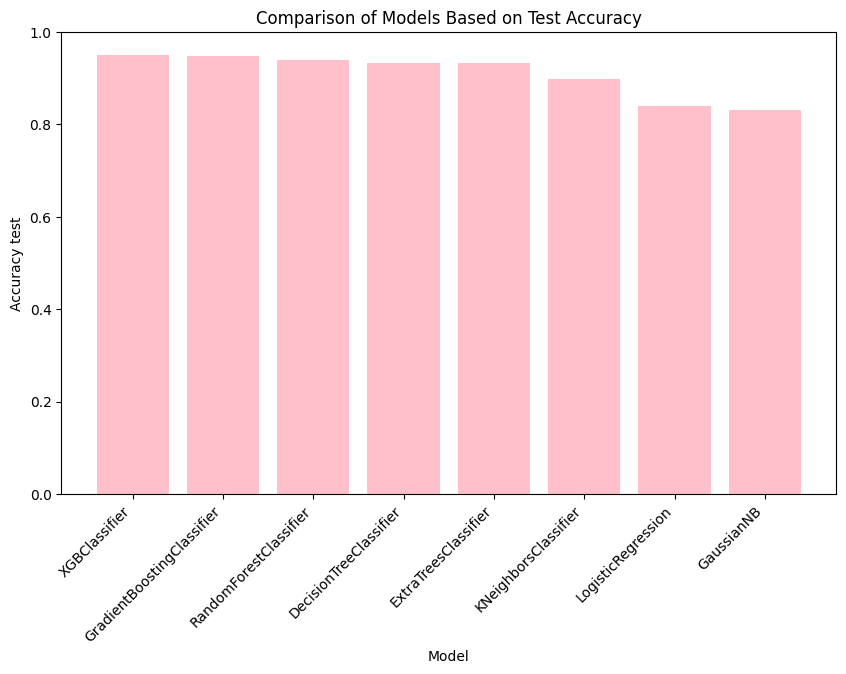

In [39]:
# Sorting the dataframe based on test accuracy
data_hasil = data_hasil.sort_values(by='Accuracy test', ascending=False)

# Creating a barplot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(data_hasil['model'], data_hasil['Accuracy test'], color='pink')
ax.set_xticklabels(data_hasil['model'], rotation=45, ha='right')
ax.set_ylim([0, 1])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy test')
ax.set_title('Comparison of Models Based on Test Accuracy')
plt.show()

In [40]:
model = XGBClassifier ().fit(X_train_scaled,y_train)

# data training
y_pred=model.predict(X_train_scaled)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     46852
           1       0.96      0.94      0.95     35109

    accuracy                           0.96     81961
   macro avg       0.96      0.96      0.96     81961
weighted avg       0.96      0.96      0.96     81961



In [41]:
# data tes
y_pred_test = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11712
           1       0.95      0.93      0.94      8778

    accuracy                           0.95     20490
   macro avg       0.95      0.95      0.95     20490
weighted avg       0.95      0.95      0.95     20490



## Cross Validation

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model = XGBClassifier()

scores = cross_val_score(model, X, y, cv=5)

acc_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
prec_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
rec_scores = cross_val_score(model, X, y, cv=5, scoring='recall')
f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')

print("Mean accuracy score: {:.2f}".format(np.mean(acc_scores)))
print("Mean precision score: {:.2f}".format(np.mean(prec_scores)))
print("Mean recall score: {:.2f}".format(np.mean(rec_scores)))
print("Mean F1 score: {:.2f}".format(np.mean(f1_scores)))

Mean accuracy score: 0.95
Mean precision score: 0.95
Mean recall score: 0.93
Mean F1 score: 0.94


## FEATURE IMPORTANCE

In [43]:
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
importance = model.feature_importances_
indices = np.argsort(importance)[: :-1]
names = [X.columns[i] for i in indices]

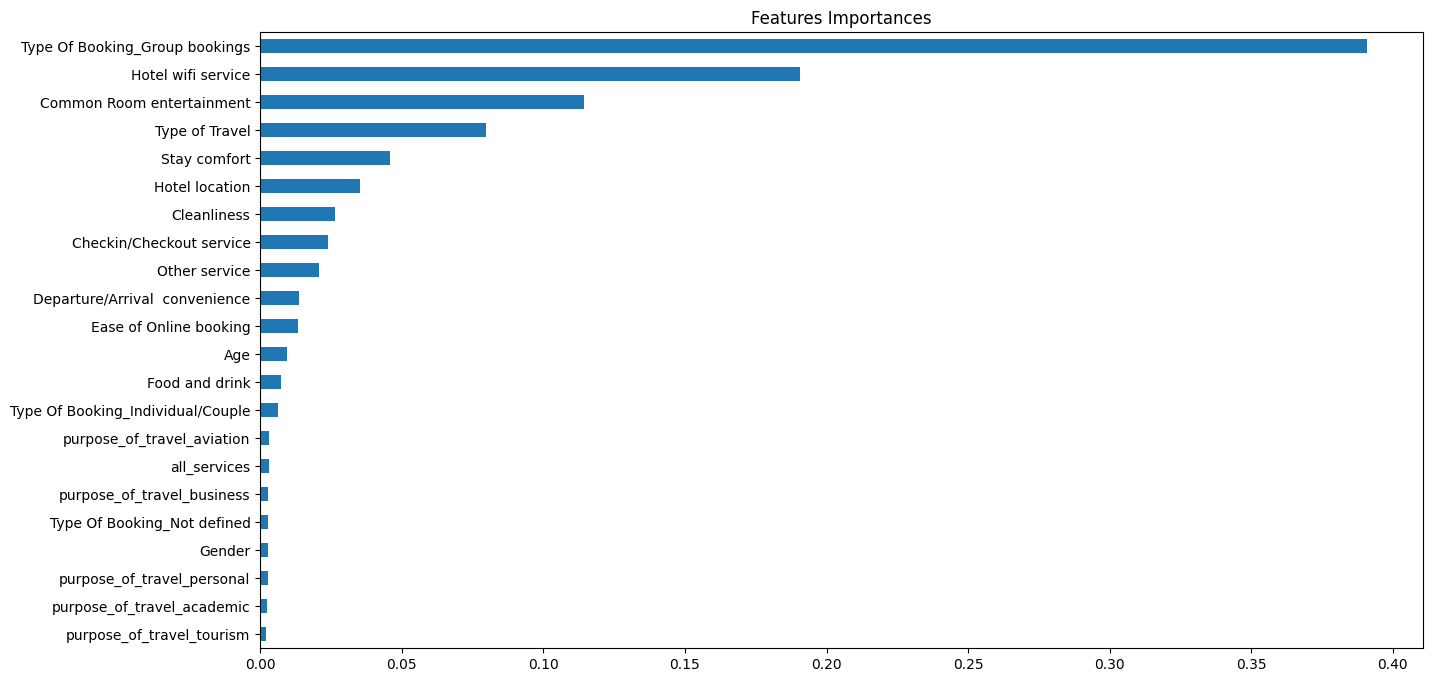

In [46]:
fi = pd.Series(data=model.feature_importances_,
                        index= X_train_scaled.columns)
fi_sorted = fi.sort_values()
plt.figure(figsize=(15,8))
fi_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.show()